In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df=pd.read_csv('tennis_stats.csv')
print(df.head)

<bound method NDFrame.head of                      Player  Year  FirstServe  FirstServePointsWon  \
0               Pedro Sousa  2016        0.88                 0.50   
1           Roman Safiullin  2017        0.84                 0.62   
2               Pedro Sousa  2017        0.83                 0.60   
3       Rogerio Dutra Silva  2010        0.83                 0.64   
4      Daniel Gimeno-Traver  2017        0.81                 0.54   
...                     ...   ...         ...                  ...   
1716             Yann Marti  2010        0.41                 0.66   
1717          Mikhail Elgin  2012        0.41                 0.60   
1718  Alexander Kudryavtsev  2012        0.40                 0.64   
1719           Ivan Nedelko  2011        0.37                 0.30   
1720       Alexander Zverev  2013        0.36                 0.50   

      FirstServeReturnPointsWon  SecondServePointsWon  \
0                          0.38                  0.50   
1              

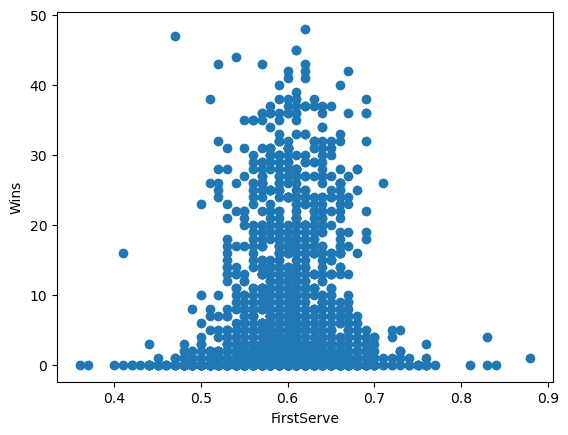

0.06483207778248021


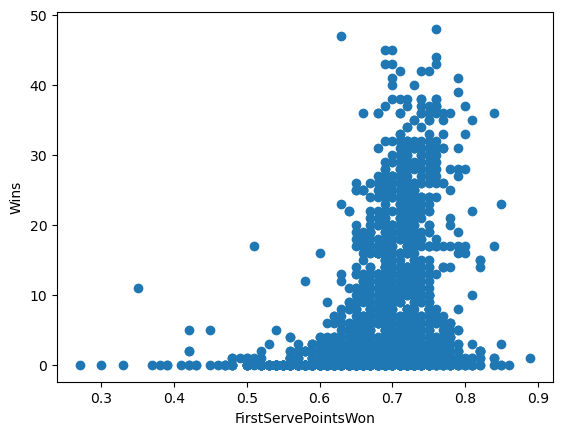

0.3567016288756445


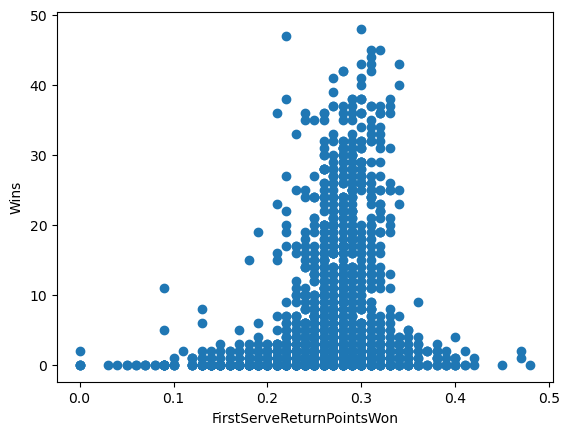

0.25602899947226343


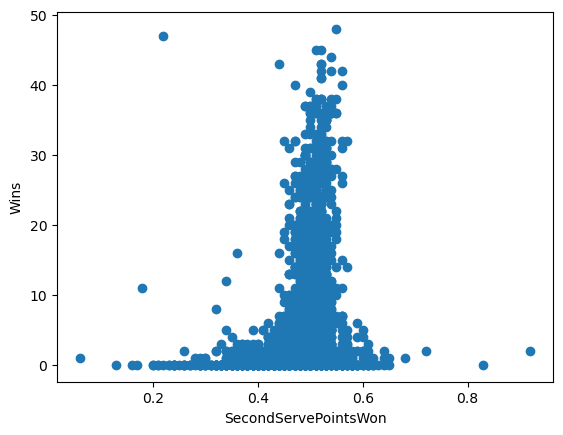

0.26897869953800424


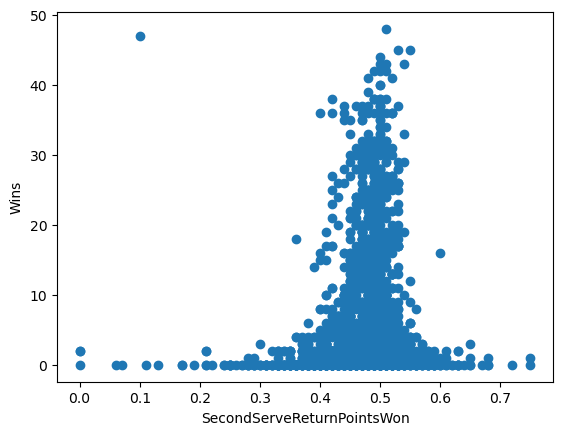

0.19309266293883165


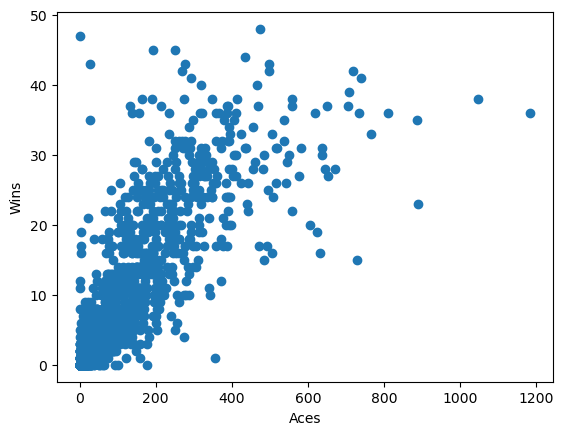

0.8253011922488607


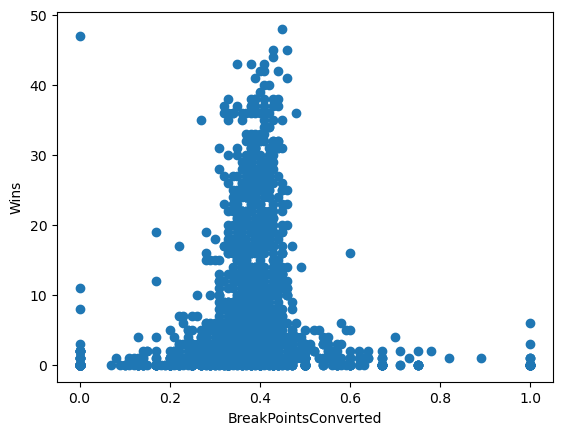

0.07698919220342906


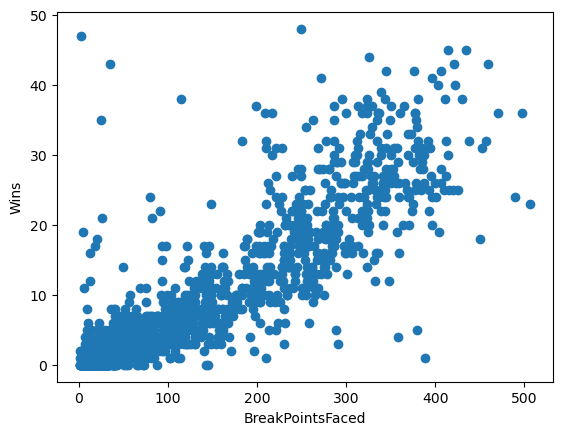

0.883469929843775


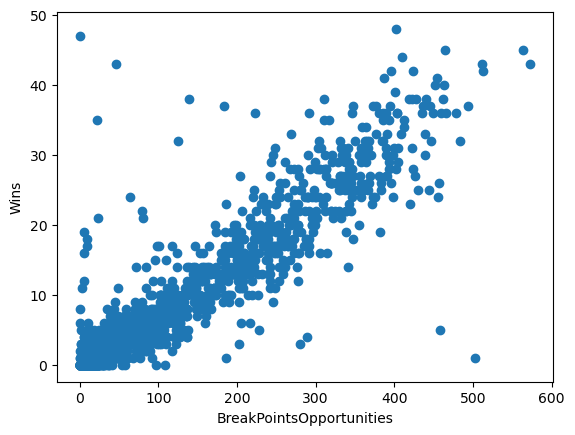

0.9234533173669666


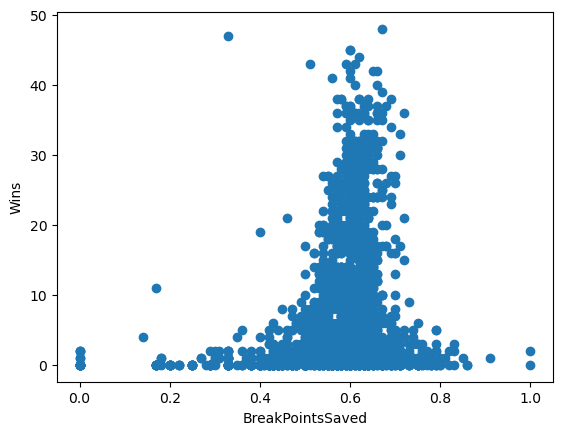

0.25205277014338257


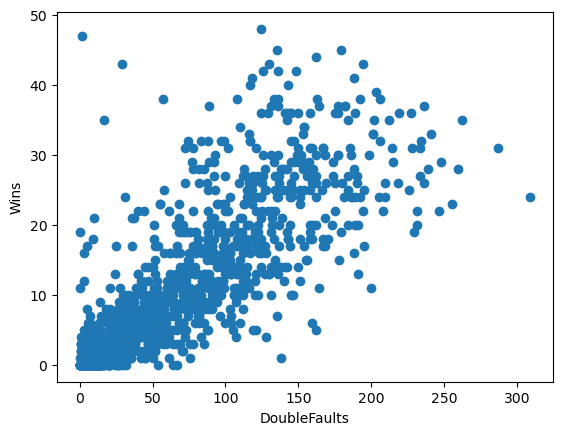

0.8474593354009935


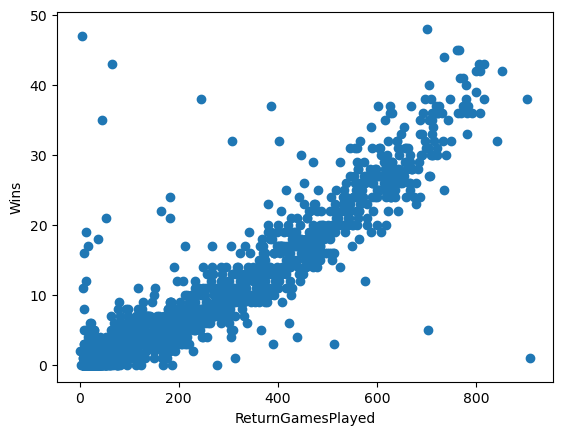

0.9284076225806662


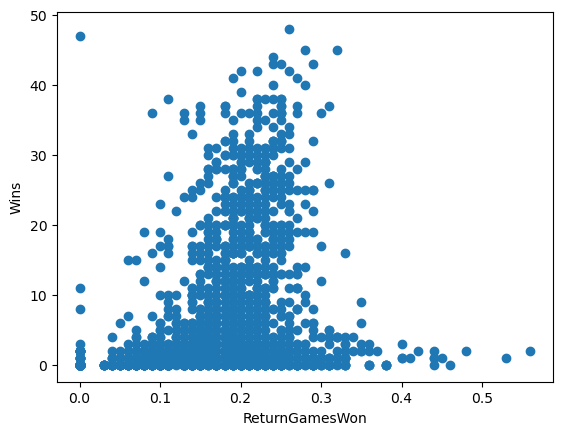

0.2929201719581872


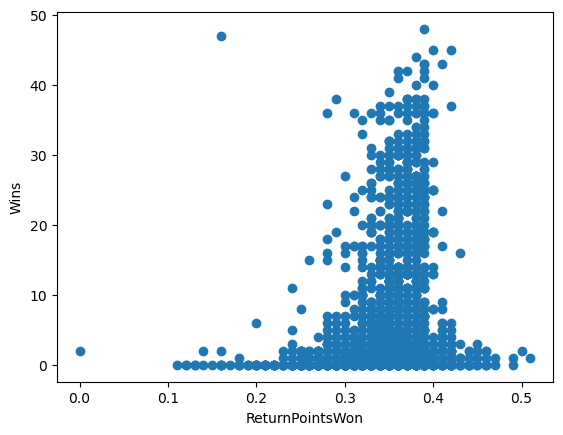

0.2802397281288612


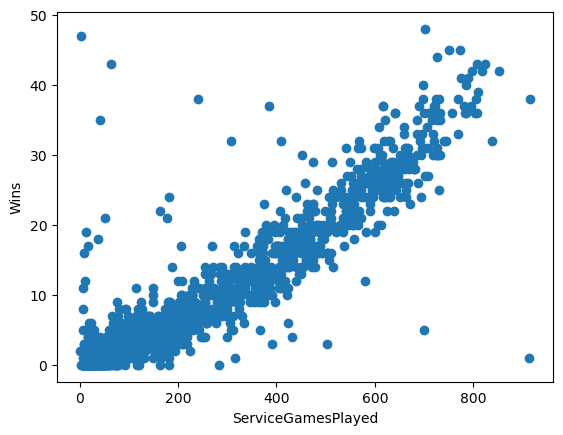

0.9291525358241299


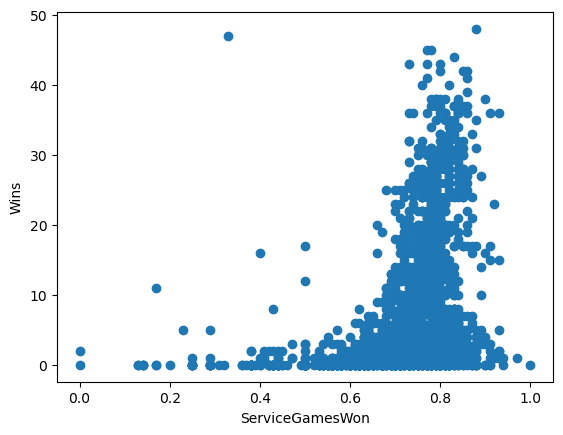

0.38504034648368474


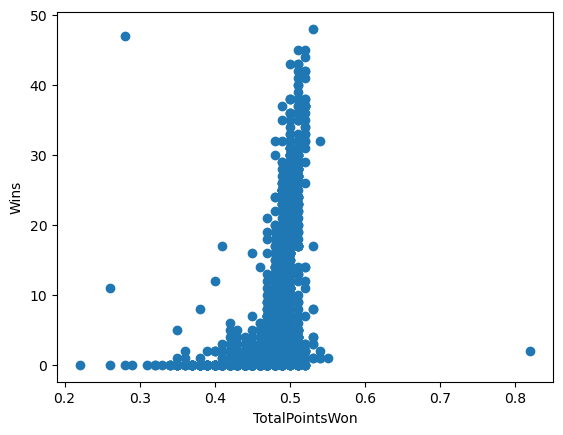

0.4593683684191049


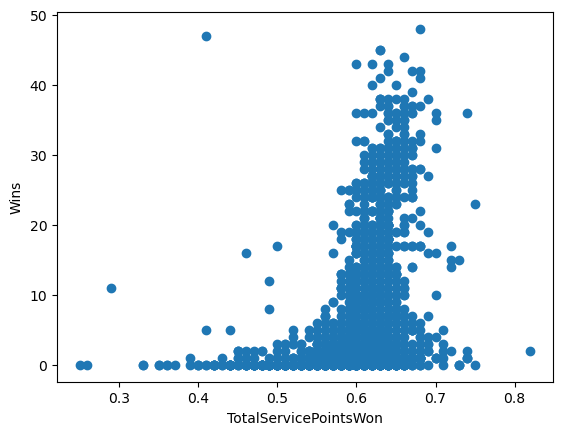

0.399270356139328


In [19]:
playerID = ['Player','Year']
variables = ['FirstServe','FirstServePointsWon',
 'FirstServeReturnPointsWon','SecondServePointsWon',
 'SecondServeReturnPointsWon','Aces','BreakPointsConverted',
 'BreakPointsFaced','BreakPointsOpportunities','BreakPointsSaved',
 'DoubleFaults','ReturnGamesPlayed','ReturnGamesWon','ReturnPointsWon',
 'ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
 'TotalServicePointsWon']
performanceIndicators = ['Wins','Winnings','Ranking']
for var in variables:
    plt.scatter(df[var],df['Wins'])
    plt.xlabel(var)
    plt.ylabel('Wins')
    plt.show()
    print(df[var].corr(df['Wins']))

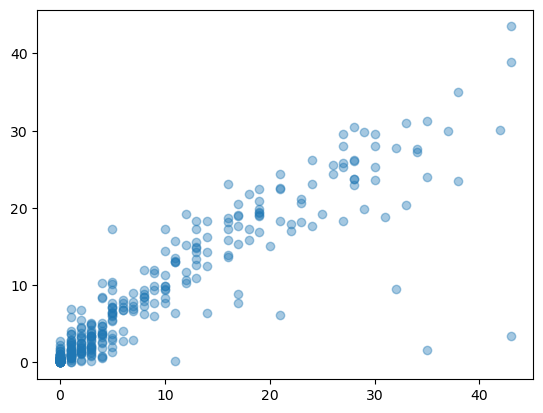

0.8242551664537515


In [23]:
features = df[['BreakPointsOpportunities']]
outcome = df[['Wins']]
features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)
model = LinearRegression()
model.fit(features_train,outcome_train)
model.score(features_test,outcome_test)
prediction = model.predict(features_test)
plt.scatter(outcome_test,prediction, alpha=0.4)
plt.show()
print(model.score(features_test,outcome_test))


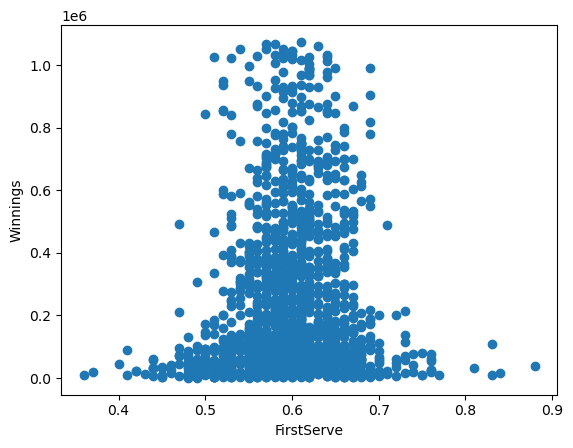

0.06483207778248021


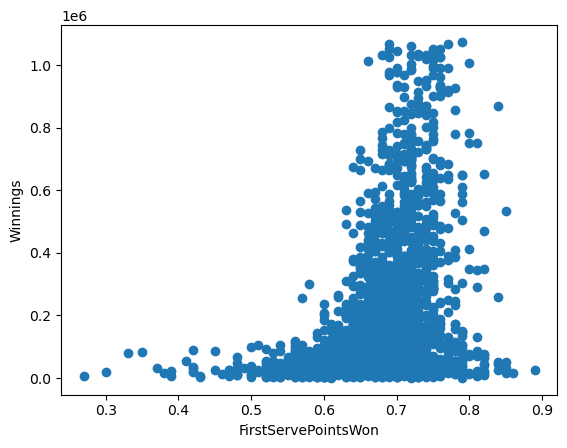

0.3567016288756445


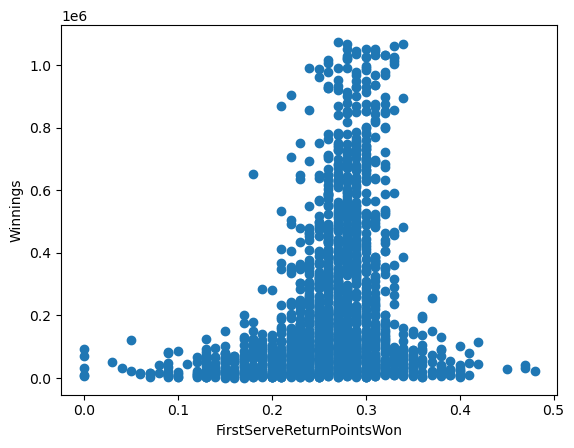

0.25602899947226343


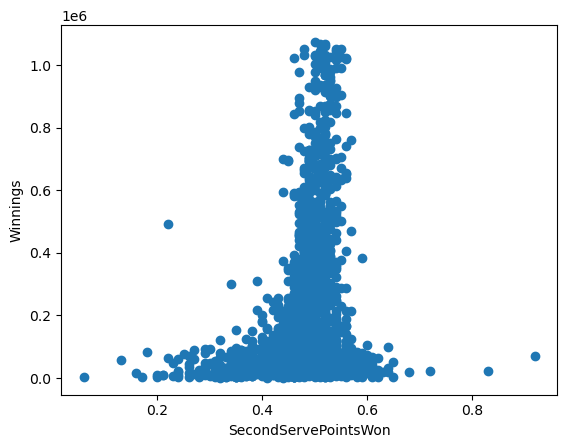

0.26897869953800424


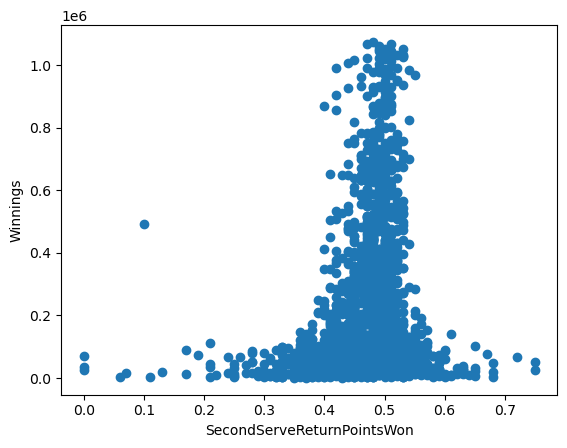

0.19309266293883165


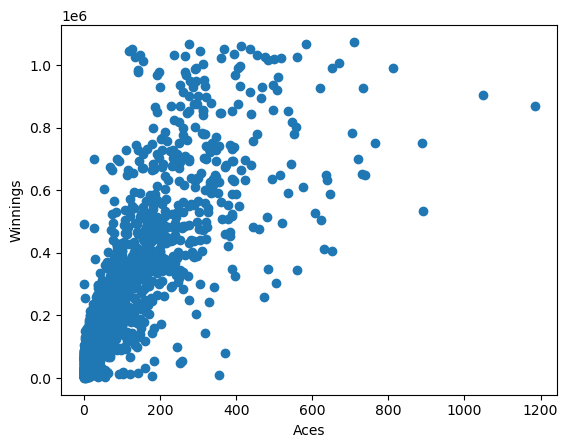

0.8253011922488607


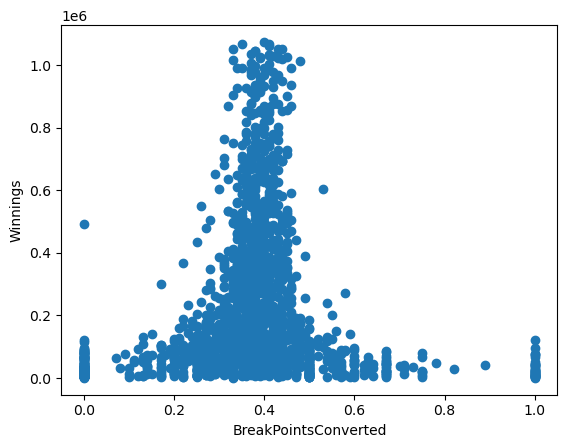

0.07698919220342906


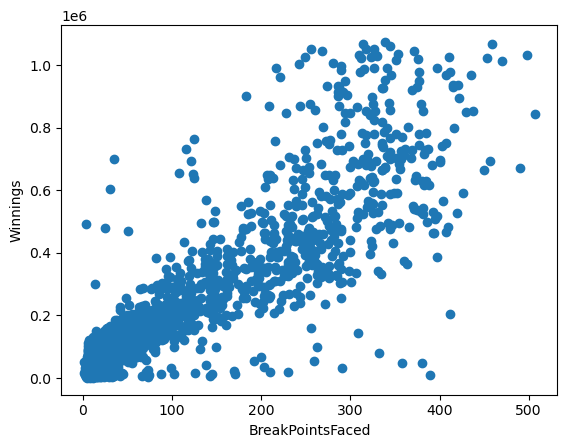

0.883469929843775


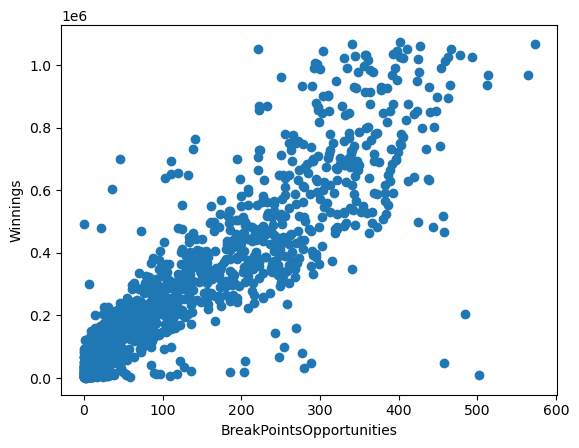

0.9234533173669666


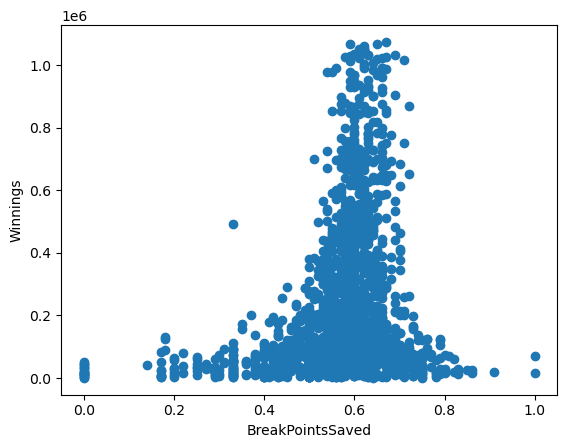

0.25205277014338257


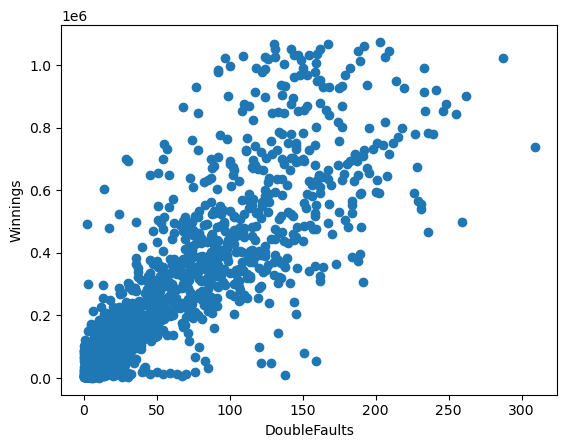

0.8474593354009935


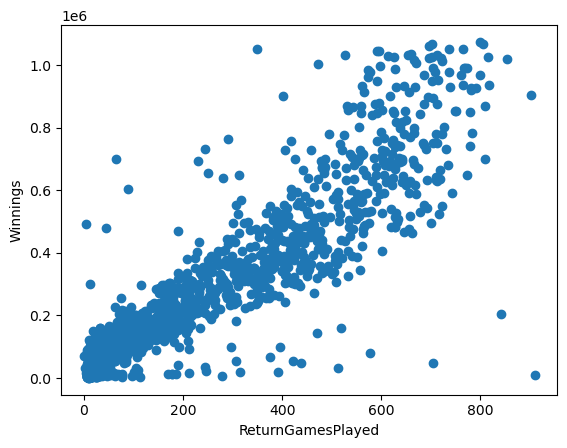

0.9284076225806662


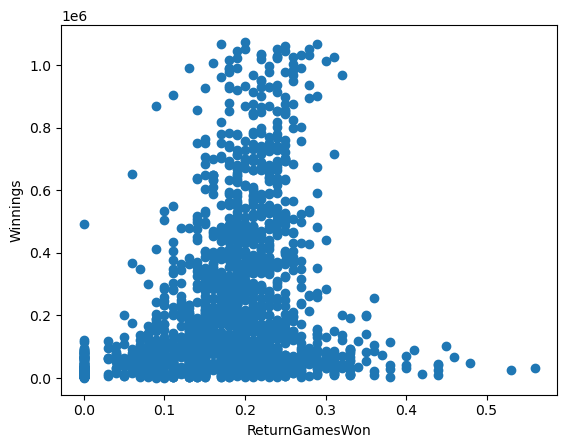

0.2929201719581872


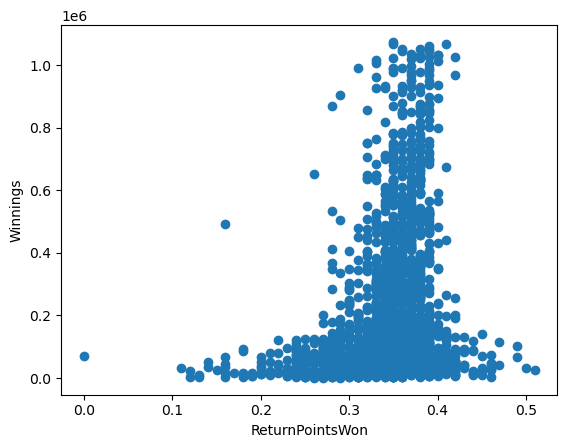

0.2802397281288612


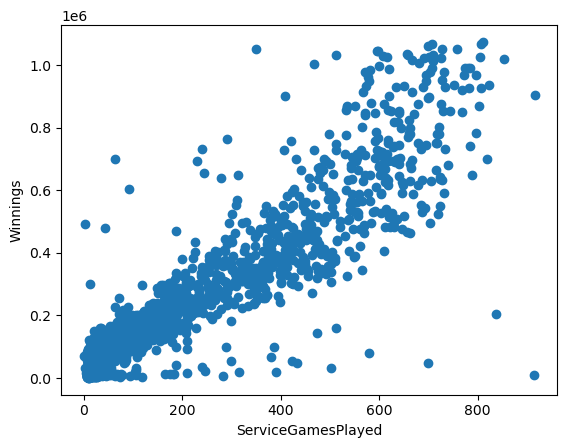

0.9291525358241299


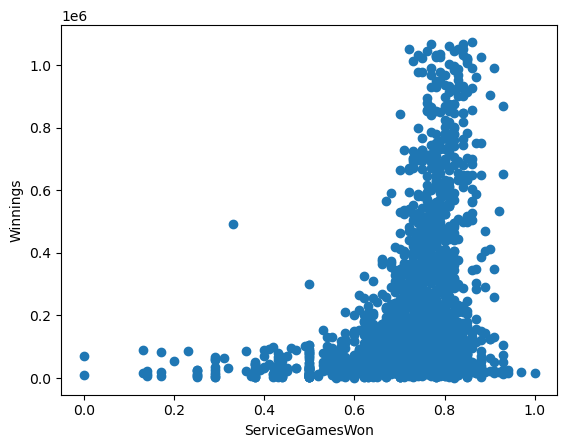

0.38504034648368474


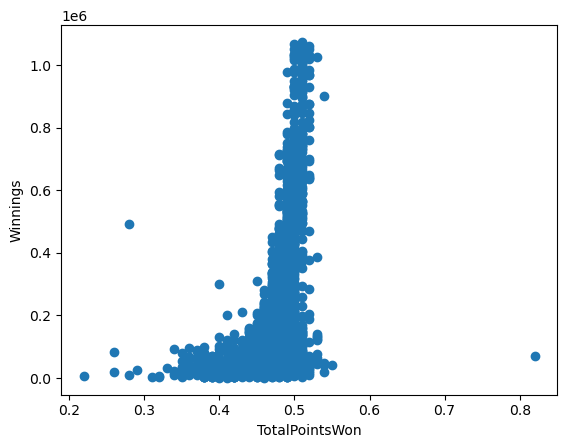

0.4593683684191049


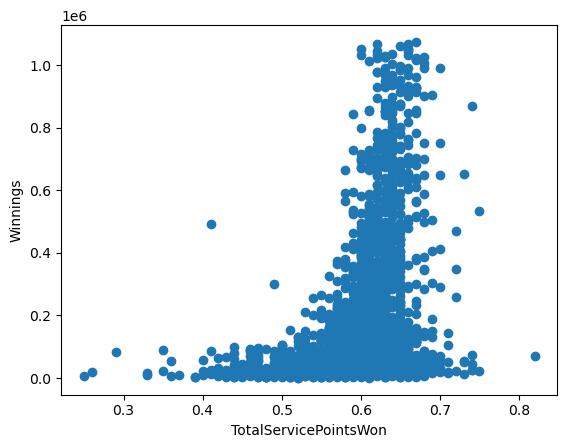

0.399270356139328
[('ServiceGamesPlayed', 0.9291525358241299), ('ReturnGamesPlayed', 0.9284076225806662), ('BreakPointsOpportunities', 0.9234533173669666), ('BreakPointsFaced', 0.883469929843775), ('DoubleFaults', 0.8474593354009935), ('Aces', 0.8253011922488607), ('TotalPointsWon', 0.4593683684191049), ('TotalServicePointsWon', 0.399270356139328), ('ServiceGamesWon', 0.38504034648368474), ('FirstServePointsWon', 0.3567016288756445), ('ReturnGamesWon', 0.2929201719581872), ('ReturnPointsWon', 0.2802397281288612), ('SecondServePointsWon', 0.26897869953800424), ('FirstServeReturnPointsWon', 0.25602899947226343), ('BreakPointsSaved', 0.25205277014338257), ('SecondServeReturnPointsWon', 0.19309266293883165), ('BreakPointsConverted', 0.07698919220342906), ('FirstServe', 0.06483207778248021)]


In [35]:
biggest_corrs={}
for var in variables:
    plt.scatter(df[var],df['Winnings'])
    plt.xlabel(var)
    plt.ylabel('Winnings')
    plt.show()
    print(df[var].corr(df['Wins']))
    biggest_corrs[var]=df[var].corr(df['Wins'])
sorted_biggest_corrs = sorted(biggest_corrs.items(), key=lambda x:x[1],reverse=True)
print(sorted_biggest_corrs)

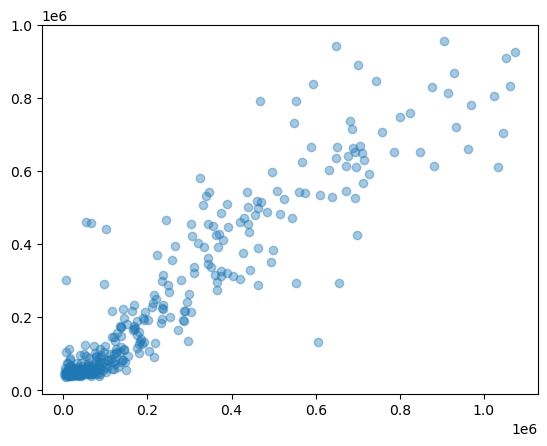

0.8575242061968844


In [41]:
#Using Correlation cutoff as 0.8
features = df[['ServiceGamesPlayed','ReturnGamesPlayed','BreakPointsOpportunities','BreakPointsFaced','DoubleFaults','Aces']]
outcome = df[['Winnings']]
features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)
model = LinearRegression()
model.fit(features_train,outcome_train)
model.score(features_test,outcome_test)
prediction = model.predict(features_test)
plt.scatter(outcome_test,prediction, alpha=0.4)
plt.show()
print(model.score(features_test,outcome_test))


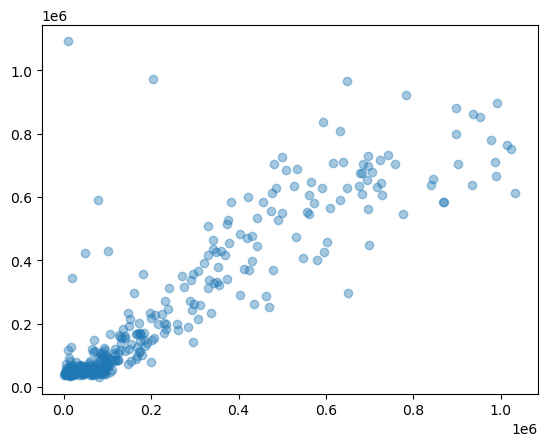

0.7868897041896026


In [43]:
#Using Correlation cutoff as 0.85
features = df[['ServiceGamesPlayed','ReturnGamesPlayed','BreakPointsOpportunities','BreakPointsFaced',]]
outcome = df[['Winnings']]
features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)
model = LinearRegression()
model.fit(features_train,outcome_train)
model.score(features_test,outcome_test)
prediction = model.predict(features_test)
plt.scatter(outcome_test,prediction, alpha=0.4)
plt.show()
print(model.score(features_test,outcome_test))

In [ ]:
#Using Correlation cutoff as 0.8 is much better then using cutoff 0.85